<img src="https://static.vecteezy.com/system/resources/previews/000/145/921/non_2x/vector-iris-flower-banner-line-art.jpg">


<a href='#'>Preface</a><br>
<a href='#desc'>description</a><br>
<a href='#about'>About notebook</a><br>
<a href='#load_lib'>Load libraries</a><br>
<a href='#load_data'>Load Dataset</a><br>
<a href='#visual'>Let's Visualize the dataset</a><br>
- <a href='#types_species'> Types of species</a>
- <a href='#corelation'>Corelation between features</a><br>
- <a href='#visual_sepal'>Visualizing species based on sepal length and width</a><br>
- <a href='#visual_petal'>Visualizing species based on petal length and width</a><br>
- <a href='#value_petal_width'>Values distribution based on petal width</a><br>
- <a href='#value_petal_length'>Values distribution based on petal length</a><br>
- <a href='#value_sepal_length'>Values distribution based on sepal length</a><br>
- <a href='#value_sepal_width'>Values distribution based on sepal width</a><br>
- <a href='#andrew'>Andrew curves</a><br>
- <a href='#lin_sepal'>Linear regression based on sepal</a><br>
- <a href='#lin_petal'>Linear regression based on petal</a><br>

<a href='#ml'>Machine Learning</a><br>
- <a href='#list'> List of algorithms</a>
- <a href='#logistic'>Logistic regression</a><br>
- <a href='#decision'>Decision tree</a><br>
- <a href='#knn'>KNN</a><br>
- <a href='#svm'>SVM</a><br>
- <a href='#nbc'>Naive Bayes Classification</a><br>
- <a href='#random'>Random forest</a><br>
- <a href='#etc'>Extra Tree Classifier</a><br>
- <a href='#xgboost'>XGBoost</a><br>
- <a href='#lbgm'>LigthGBM</a><br>

<a href='#dl'>Deep Learning</a><br>
- <a href='#shallow'>Shallow Deep learning</a><br>
- <a href='#deep'>Deep Deep learning</a><br>


# <a id='desc'> Description</a>


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

# <a id='about'>About the notebook</a>


In this notebook we will look into famous dataset which is iris, we will analyse the dataset with plotly library which is very interactive library in python then later we will apply different macine learning algorithms and see the best accuracy.



# <a id='load_lib'>Let's load the required libraries</a>


In [1]:
import numpy as np
import random
import pandas as pd
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score


import xgboost as xgb
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color


import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



# <a id='load_data'>Load data set</a>

In [2]:
df = pd.read_csv('../input/Iris.csv')
table = ff.create_table(df.head())


In [3]:
py.iplot(table,filename='jupyter-table1')


In [4]:
py.iplot(ff.create_table(df.describe()),filename='jupyter-table1')


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


so there is no null values available in the data set


# <a id='visual'>Now lets start visualizing the data set</a>

given the coloums are<br>
SepalLengthCm<br>
SepalWidthCm<br>
PetalLengthCm<br>
PetalWidthCm<br>
Species<br>

# <a id='types_species'> Types of Species</a>

In [6]:
Species = df['Species'].unique()
Species


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So there are three types of species 

Iris-setosa<br/>
Iris-versicolor<br/>
Iris-virginica<br/>

In [7]:
species_count = df['Species'].value_counts()
data = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_colors(3))
)]
py.iplot(data)


So we have equally distributed species all are of 50

# <a id='corelation'>Corelation between features</a><br>

In [8]:
corelation = df.corr()
data = [go.Heatmap(z = np.array(corelation.values),
                   x = np.array(corelation.columns),
                   y = np.array(corelation.columns),
                     colorscale='Blackbody',)
       ]
py.iplot(data)


# <a id='visual_sepal'>Visualizing species based on Sepal length and width</a><br>

In [9]:
setosa = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-setosa'], y = df['SepalWidthCm'][df.Species =='Iris-setosa']
                   , mode = 'markers', name = 'setosa')
versicolor = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-versicolor'], y = df['SepalWidthCm'][df.Species =='Iris-versicolor']
                   , mode = 'markers', name = 'versicolor')
virginica = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-virginica'], y = df['SepalWidthCm'][df.Species =='Iris-virginica']
                   , mode = 'markers', name = 'virginica')
data = [setosa, versicolor, virginica]

fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

We can easily differentiate setosa based on Sepal but for versicolor and virginica its difficult because the data is scattred.

#  <a id='visual_petal'>Visualizing species based on petal length and width</a><br>

In [10]:
setosa = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-setosa'], y = df['PetalWidthCm'][df.Species =='Iris-setosa']
                   , mode = 'markers', name = 'setosa')
versicolor = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-versicolor'], y = df['PetalWidthCm'][df.Species =='Iris-versicolor']
                   , mode = 'markers', name = 'versicolor')
virginica = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-virginica'], y = df['PetalWidthCm'][df.Species =='Iris-virginica']
                   , mode = 'markers', name = 'virginica')
data = [setosa, versicolor, virginica]

fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

Again based on petal we can easily classify setosa and for versicolor and virginica also we can classify but there is a thin line which should be taken care of

# <a id='value_petal_width'>Values distribution based on petal width</a><br>

In [11]:
trace0 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-setosa'],
                boxmean=True, name = 'setosa')

trace1 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-versicolor'],
                boxmean=True, name = 'versicolor')

trace2 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-virginica'],
                boxmean=True, name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

# <a id='value_petal_length'>Values distribution based on petal length</a><br>

In [12]:
trace0 = go.Box(y=df['PetalLengthCm'][df['Species'] == 'Iris-setosa'],name = 'setosa')

trace1 = go.Box(y=df['PetalLengthCm'][df['Species'] == 'Iris-versicolor'], name = 'versicolor')

trace2 = go.Box(y=df['PetalLengthCm'][df['Species'] == 'Iris-virginica'], name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

# <a id='value_sepal_length'>Values distribution based on sepal length</a><br>

In [13]:
trace0 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-setosa'], name = 'setosa')

trace1 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-versicolor'], name = 'versicolor')

trace2 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-virginica'], name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

# <a id='value_sepal_width'>Values distribution based on sepal width</a><br>

In [14]:
setosa = go.Box(y=df['SepalWidthCm'][df['Species'] == 'Iris-setosa'])

versicolor = go.Box(y=df['SepalWidthCm'][df['Species'] == 'Iris-versicolor'])

virginica = go.Box(y=df['SepalWidthCm'][df['Species'] == 'Iris-virginica'])

data = [trace0, trace1, trace2]
py.iplot(data)

- From the above four graph you can see that the distribution of setosa < vericolor < virginica
- There are few outliers which can be explained by the scatter plot graph.

# <a id='andrew'>Andrew curves</a><br>

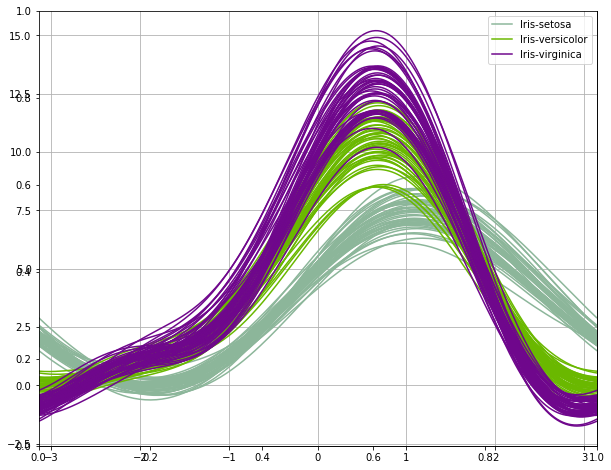

In [15]:
plt.subplots(figsize = (10,8))
plotting.andrews_curves(df.drop("Id", axis=1), "Species")

Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function.

Source - https://dzone.com/articles/andrews-curves

Lets create a regression plot for both petal and sepal

# <a id='lin_sepal'>Linear regression based on sepal</a><br>

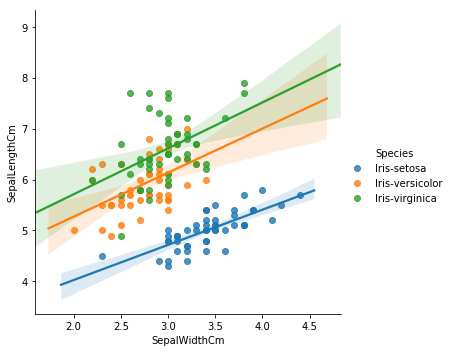

In [16]:
g = sns.lmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=df)

# <a id='lin_petal'>Linear regression based on petal</a><br>

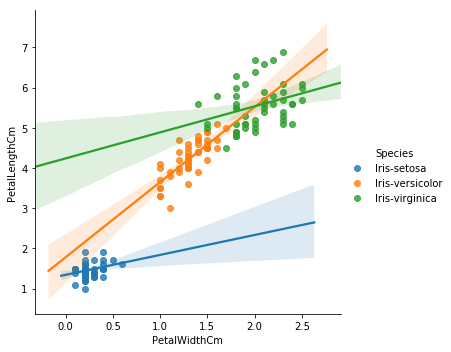

In [17]:
g = sns.lmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=df)

We have seen the visualization part
<br>
Now lets see the how to apply machine learning to the dataset

# <a id='ml'>What is machine learning ?</a><br> 

The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers learn automatically without human intervention or assistance and adjust actions accordingly.

Please go through the blog for in-depth description of machine learning
https://www.expertsystem.com/machine-learning-definition/

So by the defination we see that we need data and we do have the data (Iris dataset).
But how will we test the dataset ?

For that we will split out data set into three parts train, test, validation sets.<br>
we are going to use the scikit-learn library which has all the required functions and machine learning algorithms required for this notebook

Before we split our data lets look at the output we want to predict.<br> 
We want to predict the given sepal and petal dimensions follows to which type of species.<br>
we have 3 type of species  Iris-setosa Iris-versicolor Iris-virginica.<br>
We will convert those species names to a categorical values using label encoding.<br>

In [18]:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [19]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As you can see Iris-setosa Iris-versicolor Iris-virginica are converted to 0, 1, 2 respectively

First we are splitting the data set into training data and testing data which is 7:3 ratio 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

# <a id='list'> List of algorithms</a>

Since it is a classification problem we will be using<br>
Logistic regression<br>
Decision tree<br>
KNN<br>
SVM<br>
Naive Bayes Classification<br>
Random forest<br>
XGBoost<br>
LightGBM<br>

# <a id='logistic'>Logistic regression</a><br>

<img src = "https://image.slidesharecdn.com/logitregression-161121215510/95/intro-to-logistic-regression-4-638.jpg?cb=1479765630">

**Logistic regression** is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).
(https://www.medcalc.org/manual/logistic_regression.php)

In [22]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  0.9555555555555556


# <a id='svm'>SVM</a><br>

<img src = "https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg">

**“Support Vector Machine” (SVM)** is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).
(https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


In [23]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)

print('SVM - ',accuracy_score(svc_predict,y_test))

SVM -  1.0


# <a id='nbc'>Naive Bayes Classification</a><br>

<img src = "https://helloacm.com/wp-content/uploads/2016/03/Bayes_rule.png">

**Naive Bayes** is a simple, yet effective and commonly-used, machine learning classifier. It is a probabilistic classifier that makes classifications using the Maximum A Posteriori decision rule in a Bayesian setting. It can also be represented using a very simple Bayesian network. Naive Bayes classifiers have been especially popular for text classification, and are a traditional solution for problems such as spam detection.
(https://towardsdatascience.com/introduction-to-naive-bayes-classification-4cffabb1ae54)

In [24]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)

print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.9555555555555556


# <a id='decision'>Decision tree</a><br>

<img src = "https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png">

**Decision tree** is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
(https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

In [25]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)

print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.9333333333333333


# <a id='random'>Random forest</a><br>

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345">

**Random Forest** is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

(https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#nine)

In [26]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.9777777777777777


# <a href='etc'>Extra Tree Classifier</a><br>


(https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)

In [27]:
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_predict = etc_model.predict(x_test)

print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))


Extra Tree Classifier -  0.9555555555555556


# <a id='knn'>KNN</a><br>

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">

**K nearest neighbors** is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique.
(https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)

print('knn - ',accuracy_score(knn_predict,y_test))

knn -  1.0


# <a id='xgboost'>XGBoost</a><br>

<img src="https://i.imgur.com/e7MIgXk.png">

The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

It’s no wonder then that CERN recognized it as the best approach to classify signals from the Large Hadron Collider. This particular challenge posed by CERN required a solution that would be scalable to process data being generated at the rate of 3 petabytes per year and effectively distinguish an extremely rare signal from background noises in a complex physical process. XGBoost emerged as the most useful, straightforward and robust solution.

(https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)

In [29]:
xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train,y_train)
xg_model.score(x_test, y_test)

0.9777777777777777

# <a id='dl'>Deep Learning</a><br>

Best place to understand deep learning.
Please follow the blog

https://machinelearningmastery.com/what-is-deep-learning/

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [31]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

Spliting the data into train - 70% and test - 30%

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# <a id='shallow'>Shallow Deep learning</a>

In [33]:
shallow_model = Sequential()
shallow_model.add(Dense( 4, input_dim=4, activation = 'relu'))
shallow_model.add(Dense( units = 10, activation= 'relu'))
shallow_model.add(Dense( units = 3, activation= 'softmax'))
shallow_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
shallow_history = shallow_model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/150
105/105 [==============================] - 1s 5ms/step - loss: 0.6673 - acc: 0.5683 - val_loss: 0.6640 - val_acc: 0.6148
Epoch 2/150
105/105 [==============================] - 0s 97us/step - loss: 0.6606 - acc: 0.5937 - val_loss: 0.6596 - val_acc: 0.6370
Epoch 3/150
105/105 [==============================] - 0s 87us/step - loss: 0.6535 - acc: 0.6476 - val_loss: 0.6554 - val_acc: 0.6519
Epoch 4/150
105/105 [==============================] - 0s 87us/step - loss: 0.6477 - acc: 0.6635 - val_loss: 0.6514 - val_acc: 0.6667
Epoch 5/150
105/105 [==============================] - 0s 91us/step - loss: 0.6412 - acc: 0.6667 - val_loss: 0.6470 - val_acc: 0.6667
Epoch 6/150
105/105 [==============================] - 0s 83us/step - loss: 0.6349 - acc: 0.6667 - val_loss: 0.6425 - val_acc: 0.6667
Epoch 7/150
105/105 [==============================] - 0s 91us/step - loss: 0.6289 - acc: 0.6698 - val_loss: 0.6380 - val_acc: 0.6667
Epoch 8/150
105/10

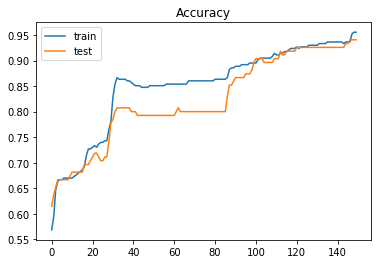

In [35]:
plt.plot(shallow_history.history['acc'])
plt.plot(shallow_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

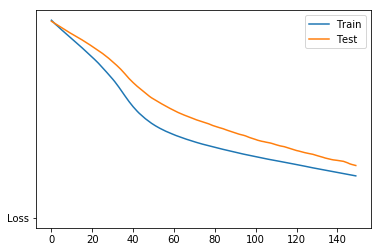

In [36]:
plt.plot(shallow_history.history['loss'])
plt.plot(shallow_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()

So our shallow model is  good accurate.

# <a id='deep'>Deep Deep learning</a>

In [37]:
deep_model = Sequential()
deep_model.add(Dense( 4, input_dim=4, activation = 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 3, activation= 'softmax'))
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
deep_history = deep_model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/150
105/105 [==============================] - 1s 7ms/step - loss: 1.0483 - acc: 0.3524 - val_loss: 1.0473 - val_acc: 0.2889
Epoch 2/150
105/105 [==============================] - 0s 133us/step - loss: 1.0256 - acc: 0.3524 - val_loss: 1.0294 - val_acc: 0.2889
Epoch 3/150
105/105 [==============================] - 0s 145us/step - loss: 1.0015 - acc: 0.3524 - val_loss: 1.0102 - val_acc: 0.2889
Epoch 4/150
105/105 [==============================] - 0s 121us/step - loss: 0.9743 - acc: 0.3905 - val_loss: 0.9882 - val_acc: 0.5333
Epoch 5/150
105/105 [==============================] - 0s 126us/step - loss: 0.9453 - acc: 0.6571 - val_loss: 0.9629 - val_acc: 0.5556
Epoch 6/150
105/105 [==============================] - 0s 125us/step - loss: 0.9126 - acc: 0.6571 - val_loss: 0.9354 - val_acc: 0.5556
Epoch 7/150
105/105 [==============================] - 0s 124us/step - loss: 0.8781 - acc: 0.6762 - val_loss: 0.9074 - val_acc: 0.5556
Epoch 8/150


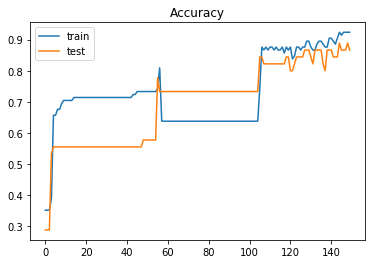

In [39]:
plt.plot(deep_history.history['acc'])
plt.plot(deep_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

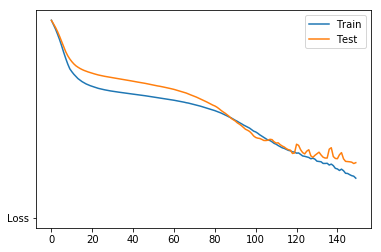

In [40]:
plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()

So our deep model is more accurate than the shallow model.

# Stay tune as the algorithms are learning. Hold tight 

# Upvote if you like 